In [31]:
import json

data_path = "random_scores.json"

In [32]:
MAX_SIZE = 100
with open(data_path, "r") as f:
    data = json.load(f)[:MAX_SIZE]

In [33]:
print(f"Amount of scores in data: {len(data)}")

Amount of scores in data: 100


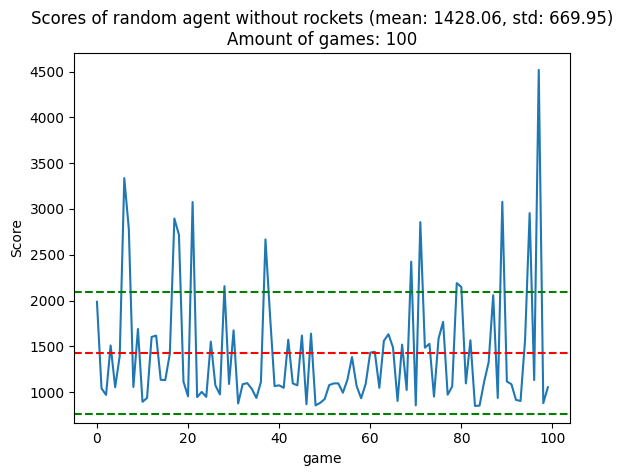

In [34]:
# add graph with statistics
import matplotlib.pyplot as plt
import numpy as np


def plot_scores(data):
    scores = [score for score in data]

    plt.plot(scores)
    mean = np.mean(scores)
    std = np.std(scores)
    plt.axhline(y=mean, color="r", linestyle="--")
    plt.axhline(y=mean + std, color="g", linestyle="--")
    plt.axhline(y=mean - std, color="g", linestyle="--")

    plt.title(f"Scores of random agent without rockets (mean: {mean:.2f}, std: {std:.2f})\nAmount of games: {len(scores)}")
    plt.xlabel("game")
    plt.ylabel("Score")
    plt.show()


plot_scores(data)


In [30]:
# table of top 5 scores and their generation
def top_scores(data, n=5):
    scores = [(i, score) for i, score in enumerate(data)]
    scores.sort(key=lambda x: x[1], reverse=True)
    return scores[:n]


top_scores_results = top_scores(data)
print("Top scores:")
for i, score in top_scores_results:
    print(f"Generation: {i+1}, score: {score}")

Top scores:
Generation: 91, score: 3402
Generation: 71, score: 3075
Generation: 59, score: 2955
Generation: 76, score: 2811
Generation: 2, score: 2748
